In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('cars.csv')
df.head(2)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0


In [3]:
df = df.drop(['seller_name','seller_rating'], axis = 'columns')
df.head(2)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,4.4,12.0,NaN,17995.0


In [4]:
df.manufacturer.value_counts()

manufacturer
Ford             79526
Toyota           59535
Chevrolet        56043
Nissan           48529
Jeep             41665
Mercedes-Benz    40824
Honda            37612
BMW              37570
Kia              35063
GMC              29563
Dodge            25250
Subaru           24767
Volkswagen       24620
Hyundai          22203
Lexus            21301
RAM              19364
Audi             17863
Cadillac         17794
Mazda            15485
Buick            14624
Chrysler         12647
INFINITI         12289
Land Rover       12272
Porsche          11461
Lincoln          10608
Volvo            10029
Acura             8489
Tesla             5883
Mitsubishi        5743
Jaguar            3469
Name: count, dtype: int64

In [5]:
df.model.describe()

count        762091
unique        12187
top       Fusion SE
freq           3172
Name: model, dtype: object

In [6]:
df.model.value_counts()

model
Fusion SE                     3172
Sportage LX                   2873
Corolla LE                    2836
GLC 300 Base 4MATIC           2718
Sentra SV                     2652
                              ... 
E-Class Coupe //AMG Sport        1
E-Class E 400 Cabriolet 2D       1
400 Base                         1
E-Class 3.0                      1
S60 T5 Drive-E Platinum          1
Name: count, Length: 12187, dtype: int64

In [7]:
model_name = [mo.split()[0] for mo in df.model]

In [8]:
df['model_name'] = model_name 

In [9]:
df.model_name.describe()

count       762091
unique         748
top       Wrangler
freq         11965
Name: model_name, dtype: object

In [10]:
df.transmission.describe()

count                752187
unique                 1313
top       6-Speed Automatic
freq                 148597
Name: transmission, dtype: object

In [11]:
new_transmission = ['Dual-Clutch' if ('dual-clutch' in str(tr).lower()) else
                    'Manual' if ('manual' in str(tr).lower()) else 
                    'A/T' if ('a/t' in str(tr).lower()) else 
                    'M/T' if ('m/t' in str(tr).lower()) else 
                    'CVT' if ('cvt' in str(tr).lower()) else
                    'Continuously Variable' if ('continuously variable' in str(tr).lower()) else
                    'Automatic' if ('automatic' in str(tr).lower() or 'auto' in str(tr).lower()) else
                    str(tr)
                    for tr in df.transmission]


In [12]:
new_transmission_series = pd.Series(new_transmission)
new_transmission_series.describe()

count        762091
unique          155
top       Automatic
freq         597377
dtype: object

In [13]:
df['new_transmission_series'] = new_transmission_series

In [14]:
df.drivetrain.describe()

count                740529
unique                   33
top       Front-wheel Drive
freq                 241432
Name: drivetrain, dtype: object

In [15]:
df.fuel_type.describe()

count       739164
unique          36
top       Gasoline
freq        644644
Name: fuel_type, dtype: object

In [16]:
df.isna().sum()

manufacturer                    0
model                           0
year                            0
mileage                       506
engine                      15050
transmission                 9904
drivetrain                  21562
fuel_type                   22927
mpg                        142071
exterior_color               8859
interior_color              56975
accidents_or_damage         24212
one_owner                   31483
personal_use_only           24852
driver_rating               31632
driver_reviews_num              0
price_drop                 351979
price                           0
model_name                      0
new_transmission_series         0
dtype: int64

In [17]:
df.price_drop = df['price_drop'].fillna(0)
df.interior_color = df.interior_color.fillna(df.exterior_color)
df.exterior_color = df.interior_color.fillna(df.interior_color)
df.interior_color = df.interior_color.fillna('Black')
df.exterior_color = df.exterior_color.fillna('Black')
df.one_owner = df.one_owner.fillna(0)
df.mileage = df.mileage.fillna(int(df.mileage.mean().round()))
df.mpg = df.mpg.fillna('0-0')
df.isna().sum()

manufacturer                   0
model                          0
year                           0
mileage                        0
engine                     15050
transmission                9904
drivetrain                 21562
fuel_type                  22927
mpg                            0
exterior_color                 0
interior_color                 0
accidents_or_damage        24212
one_owner                      0
personal_use_only          24852
driver_rating              31632
driver_reviews_num             0
price_drop                     0
price                          0
model_name                     0
new_transmission_series        0
dtype: int64

In [18]:
df.mpg.describe()

count     762091
unique       865
top          0-0
freq      149336
Name: mpg, dtype: object

In [19]:
df.mpg.value_counts()[-50:]

mpg
21-14      1
18-13      1
13-26      1
14-23.0    1
11-30.2    1
10-31      1
19-25.0    1
15-12      1
11-30      1
10-8       1
24-0.0     1
51-46.0    1
26-37.0    1
26-39.0    1
18-24.0    1
12-0.0     1
30-35.6    1
49-45      1
40-81      1
50-45.0    1
11-16.0    1
20-22.0    1
29-39.5    1
27-38.0    1
21-20      1
23-26.9    1
22-16      1
10-7       1
23-31.5    1
22-34.0    1
21-36      1
22-28.5    1
20-23.0    1
22-21      1
16-20.0    1
12-8       1
25-28.0    1
11-25.6    1
20-25.0    1
9-34       1
42-42      1
28-35.0    1
32-33      1
25-34.0    1
43-36      1
23-31.0    1
29-42      1
46-41      1
47-47.0    1
19-27.5    1
Name: count, dtype: int64

In [20]:
data = {}
temp = pd.DataFrame(data)

# Split the values into two separate columns
temp[['a', 'b']] = df['mpg'].str.split('-', expand=True)
temp.b = temp.b.fillna(0)
temp.isna().sum()

a    0
b    0
dtype: int64

In [21]:
# Convert the values to float, then to integer with error handling
temp['a'] = temp['a'].astype(float).astype(int)
temp['b'] = temp['b'].astype(float).astype(int)

# Create a new column with the desired format
df['mpg_lower'] = temp['a'].where(temp['a'] < temp['b'], temp['b'])
df['mpg_upper'] = temp['b'].where(temp['a'] < temp['b'], temp['a'])

In [22]:
df.exterior_color.describe()

count     762091
unique      6647
top        Black
freq      301626
Name: exterior_color, dtype: object

In [23]:
colors = ["red", "orange", "yellow", "green", "blue", "purple", "pink", "brown", "black", "white", "gray", "cyan", "magenta", "turquoise", "lavender", "peach", "maroon", "olive", "navy", "teal", "gold", "silver", "indigo", "violet", "beige", "crimson", "lime", "sky blue", "coral", "mint green", "tan", "khaki", "auburn", "burgundy", "chartreuse", "cyan", "fuchsia", "ivory", "magenta", "salmon", "periwinkle", "russet", "scarlet", "sepia", "tangerine", "vermilion", "emerald", "turquoise", "teal", "azure", "cerulean", "amethyst", "sapphire", "ruby", "emerald", "topaz", "rose", "malachite", "cobalt", "alabaster", "sienna", "taupe", "wisteria", "aquamarine", "jasmine", "pearl", "celadon", "umber", "obsidian", "lavender", "mauve", "periwinkle", "orchid", "creme", "sky blue", "mint", "champagne", "steel blue", "coffee", "honey", "mustard", "cream"]
df['exterior_color'] = df['exterior_color'].apply(lambda row: next((color for color in colors if color.lower() in row.lower()), None))
df['interior_color'] = df['interior_color'].apply(lambda row: next((color for color in colors if color.lower() in row.lower()), None))


In [24]:
df.exterior_color.describe()

count     595887
unique        54
top        black
freq      405970
Name: exterior_color, dtype: object

In [25]:
df.exterior_color.value_counts()

exterior_color
black        405970
gray          77483
beige         27409
red           16086
white         15643
tan           13080
brown         12592
silver         6699
blue           6566
ivory          5796
cream          1235
taupe          1091
orange          865
green           688
navy            666
coffee          473
gold            444
maroon          340
sepia           322
auburn          287
pearl           278
yellow          274
burgundy        273
khaki           238
umber           193
russet          184
indigo          142
champagne       119
purple           67
obsidian         51
orchid           44
ruby             43
scarlet          42
lime             32
olive            28
alabaster        27
teal             21
creme            20
turquoise        12
sienna           11
sapphire          8
amethyst          7
pink              6
crimson           6
topaz             6
rose              4
azure             3
violet            3
cerulean          3
coral

In [26]:
df.interior_color.describe()

count     595887
unique        54
top        black
freq      405970
Name: interior_color, dtype: object

In [27]:
df.engine.describe()

count                         747041
unique                          6903
top       2.0L I4 16V GDI DOHC Turbo
freq                           75545
Name: engine, dtype: object

In [28]:
df.engine.value_counts()

engine
2.0L I4 16V GDI DOHC Turbo             75545
3.6L V6 24V MPFI DOHC                  35437
3.6L V6 24V GDI DOHC                   27020
2.0L I4 16V MPFI DOHC                  19534
1.5L I4 16V GDI DOHC Turbo             18173
                                       ...  
L                                          1
450 CID V8                                 1
302CI V8                                   1
5.8L 8 Cylinder                            1
2.5L 5-cylinder turbocharged engine        1
Name: count, Length: 6903, dtype: int64

In [29]:
new_engine = ['SOHC Hybrid' if ('sohc hybrid' in str(en).lower()) else
                    'MPFI DOHC' if ('mpfi dohc' in str(en).lower()) else 
                    'MPFI SOHC' if ('mpfi sohc' in str(en).lower()) else 
                    'SPFI DOHC' if ('spfi dohc' in str(en).lower()) else 
                    'SPFI SOHC' if ('spfi sohc' in str(en).lower()) else 
                    'DOHC Twin Turbo Hybrid' if ('dohc twin turbo Hybrid' in str(en).lower()) else 
                    'DOHC Turbo' if ('dohc turbo' in str(en).lower()) else 
                    'GDI DOHC' if ('gdi dohc' in str(en).lower()) else 
                    'GDI SOHC' if ('gdi sohc' in str(en).lower()) else  
                    'MPFI SOHC' if ('mpfi sohc' in str(en).lower()) else  
                    'MPFI DOHC' if ('mpfi dohc' in str(en).lower()) else  
                    'OHV Turbo Diesel' if ('OHV Turbo Diesel'.lower() in str(en).lower()) else  
                    'PDI DOHC Hybrid' if ('PDI DOHC Hybrid'.lower() in str(en).lower()) else  
                    'PDI DOHC' if ('PDI DOHC'.lower() in str(en).lower()) else  
                    'GDI OHV' if ('GDI OHV'.lower() in str(en).lower()) else  
                    'MPFI OHV' if ('MPFI OHV'.lower() in str(en).lower()) else  
                    'Intercooled Turbo' if ('Intercooled Turbo'.lower() in str(en).lower()) else  
                    'Cylinder Engine' if ('Cylinder Engine'.lower() in str(en).lower()) else  
                    'gasoline direct injection' if ('gasoline direct injection'.lower() in str(en).lower()) else  
                    'Thunderjet' if ('Thunderjet'.lower() in str(en).lower()) else  
                    'Coyote' if ('Coyote'.lower() in str(en).lower()) else  
                    'Diesel Twin Turbo' if ('Diesel Twin Turbo'.lower() in str(en).lower()) else  
                    'Turbocharged Diesel' if ('Turbocharged Diesel'.lower() in str(en).lower()) else  
                    'Turbodiesel' if ('Turbodiesel'.lower() in str(en).lower()) else  
                    'DOHC' if ('DOHC'.lower() in str(en).lower()) else  
                    'SOHC' if ('SOHC'.lower() in str(en).lower()) else  
                    'CID' if ('CID'.lower() in str(en).lower()) else  
                    'Electric' if ('Electric'.lower() in str(en).lower()) else  
                    'Diesel' if ('Diesel'.lower() in str(en).lower()) else  
                    'GDI' if ('GDI'.lower() in str(en).lower()) else  
                    '8 Cylinder' if ('8 Cylinder'.lower() in str(en).lower()) else  
                    'turbo diesel' if ('turbo diesel'.lower() in str(en).lower()) else  
                    'BOOST TURBO' if ('BOOST TURBO'.lower() in str(en).lower()) else  
                    'ci V8' if ('ci V8'.lower() in str(en).lower()) else  
                    'Twin Turbo' if ('Twin Turbo'.lower() in str(en).lower()) else  
                    'Flex Fuel' if ('Flex Fuel'.lower() in str(en).lower()) else  
                    'BBC' if ('BBC'.lower() in str(en).lower()) else  
                    'PFDI' if ('PFDI'.lower() in str(en).lower()) else  
                    'Roller' if ('Roller'.lower() in str(en).lower()) else  
                    'Liter' if ('Liter'.lower() in str(en).lower()) else  
                    'barrel' if ('barrel'.lower() in str(en).lower()) else  
                    'EFI' if ('EFI'.lower() in str(en).lower()) else  
                    'Stroker' if ('Stroker'.lower() in str(en).lower()) else  
                    'BLUME' if ('BLUME'.lower() in str(en).lower()) else  
                    'ECOBOOST' if ('ECOBOOST'.lower() in str(en).lower()) else  
                    'Regular Unleaded' if ('Regular Unleaded'.lower() in str(en).lower()) else  
                    'MultiAir2 Tigershark' if ('MultiAir2 Tigershark'.lower() in str(en).lower()) else  
                    'Turbocharged Gas' if ('Turbocharged Gas'.lower() in str(en).lower()) else  
                    'Intercooled Supercharger Premium Unleaded' if ('Intercooled Supercharger Premium Unleaded'.lower() in str(en).lower()) else  
                    'Vortec' if ('Vortec'.lower() in str(en).lower()) else  
                    'Premium Unleaded' if ('Premium Unleaded'.lower() in str(en).lower()) else  
                    'Intercooled Supercharger Premium Unleaded' if ('Intercooled Supercharger Premium Unleaded'.lower() in str(en).lower()) else  
                    'Regular Unleaded' if ('Regular Unleaded'.lower() in str(en).lower()) else  
                    'DEVCT' if ('DEVCT'.lower() in str(en).lower()) else  
                    'Triton' if ('Triton'.lower() in str(en).lower()) else  
                    'VVT' if ('VVT'.lower() in str(en).lower()) else  
                    'HEMI' if ('HEMI'.lower() in str(en).lower()) else  
                    'Power Tech' if ('Power Tech'.lower() in str(en).lower()) else  
                    'MIVEC' if ('MIVEC'.lower() in str(en).lower()) else  
                    'Cyl' if ('Cyl'.lower() in str(en).lower()) else  
                    'Turbocharged' if ('Turbocharged'.lower() in str(en).lower()) else  
                    'SIDI' if ('SIDI'.lower() in str(en).lower()) else  
                    'ZR-FAE' if ('ZR-FAE'.lower() in str(en).lower()) else  
                    'USABLE' if ('USABLE'.lower() in str(en).lower()) else  
                    'OHV' if ('OHV'.lower() in str(en).lower()) else  
                    'TIVCT' if ('TIVCT'.lower() in str(en).lower()) else  
                    'Supercharged' if ('Supercharged'.lower() in str(en).lower()) else  
                    'Gas/Ethanol' if ('Gas/Ethanol'.lower() in str(en).lower()) else  
                    'Turbocharger' if ('Turbocharger'.lower() in str(en).lower()) else  
                    'Duratec' if ('Duratec'.lower() in str(en).lower()) else  
                    'VTEC' if ('VTEC'.lower() in str(en).lower()) else  
                    'V-6' if ('V-6'.lower() in str(en).lower()) else  
                    'V-8' if ('V-8'.lower() in str(en).lower()) else  
                    'Gas V6' if ('Gas V6'.lower() in str(en).lower()) else  
                    'Direct Injection' if ('Direct Injection'.lower() in str(en).lower()) else  
                    'Natural Aspiration' if ('Natural Aspiration'.lower() in str(en).lower()) else  
                    'Flexible Fuel' if ('Flexible Fuel'.lower() in str(en).lower()) else  
                    'V8' if ('V8'.lower() in str(en).lower()) else  
                    'V6' if ('V6'.lower() in str(en).lower()) else  
                    'H-6' if ('H-6'.lower() in str(en).lower()) else  
                    'I6' if ('I6'.lower() in str(en).lower()) else  
                    'I-4' if ('I-4'.lower() in str(en).lower()) else  
                    'Turbo' if ('Turbo'.lower() in str(en).lower()) else  
                    'Direct Fuel Injection' if ('Direct Fuel Injection'.lower() in str(en).lower()) else  
                    str(en) 
                    for en in df.engine]

In [30]:
df['new_engine'] = new_engine

In [31]:
df.new_engine.describe()

count        762091
unique          652
top       MPFI DOHC
freq         171840
Name: new_engine, dtype: object

In [32]:
df.new_engine.value_counts()[200:250]

new_engine
3.6L H6                                                3
H4                                                     3
8.4L V-10 variable valve control, engine with 640HP    3
B4, 2.4L                                               3
MPFI                                                   3
2.3L GTDI                                              3
5.9L                                                   3
2.0L I4 MPI                                            3
80kW AC Synchronous Motor                              3
1.7L I4                                                3
L4, 2.4L                                               3
Engine: 2.4L I4 ZERO EVAP M-AIR                        3
Gas Flat 4 2.5L/152                                    3
2.4L I4 Zero Evap M-Air Engine                         3
ENGINE: 2.4L I4 ZERO EVAP M-AIR W/ESS                  3
4L I-6 engine with 190HP                               3
4.0                                                    3
6.4L                

In [33]:
df.head(5)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,driver_rating,driver_reviews_num,price_drop,price,model_name,new_transmission_series,mpg_lower,mpg_upper,new_engine
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,None,...,0.0,4.4,12.0,300.0,13988.0,ILX,Automatic,38,39,VTEC
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,None,...,1.0,4.4,12.0,0.0,17995.0,ILX,CVT,38,39,SOHC Hybrid
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,None,...,1.0,4.4,12.0,500.0,17000.0,ILX,CVT,38,39,SOHC Hybrid
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,None,...,1.0,4.4,12.0,675.0,14958.0,ILX,CVT,38,39,SOHC Hybrid
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,None,...,1.0,4.4,12.0,300.0,14498.0,ILX,CVT,38,39,SOHC Hybrid


In [34]:
df = df.dropna()

In [35]:
scaler = StandardScaler()
numerical_columns = ['mpg_lower','mpg_upper','year', 'mileage', 'accidents_or_damage', 'one_owner', 'personal_use_only', 'driver_rating', 'driver_reviews_num', 'price_drop']
df.loc[:, numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [36]:
def remove_outliers_iqr(data, column, k=1.5):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [37]:
#df.year = remove_outliers_iqr(df,'year')
df = remove_outliers_iqr(df, 'price', k=1.5)
df = remove_outliers_iqr(df, 'year', k=1.5)
df = remove_outliers_iqr(df, 'mileage', k=1.5)
df = remove_outliers_iqr(df, 'driver_reviews_num', k=1.5)
df = remove_outliers_iqr(df, 'price_drop', k=1.5)
df = remove_outliers_iqr(df, 'mpg_lower', k=1.5)
df = remove_outliers_iqr(df, 'mpg_upper', k=1.5)

In [38]:
df.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,driver_rating,driver_reviews_num,price_drop,price,mpg_lower,mpg_upper
count,350765.000000,350765.000000,350765.000000,350765.000000,350765.000000,350765.000000,350765.000000,350765.000000,350765.000000,350765.000000,350765.000000
mean,0.129893,-0.078938,0.012067,0.040083,-0.006168,0.103408,-0.079607,-0.185498,27826.530150,0.318666,0.350129
std,0.692263,0.809775,1.007187,0.996310,1.002148,0.818475,0.647732,0.424160,11527.976061,0.472137,0.454413
min,-1.861237,-1.341270,-0.564418,-1.074452,-1.411408,-13.243788,-0.808400,-0.523125,1.000000,-1.104889,-0.820913
25%,-0.421243,-0.718840,-0.564418,-1.074452,-1.411408,-0.089580,-0.605428,-0.523125,19475.000000,-0.042125,0.039907
50%,0.298754,-0.237962,-0.564418,0.930707,0.708512,0.275815,-0.256318,-0.367243,25998.000000,0.276705,0.298153
75%,0.538753,0.434211,-0.564418,0.930707,0.708512,0.641209,0.312001,0.007068,34899.000000,0.595534,0.642481
max,1.258750,2.327918,1.771738,0.930707,0.708512,1.371999,1.862701,1.364785,66095.000000,1.870851,1.503301


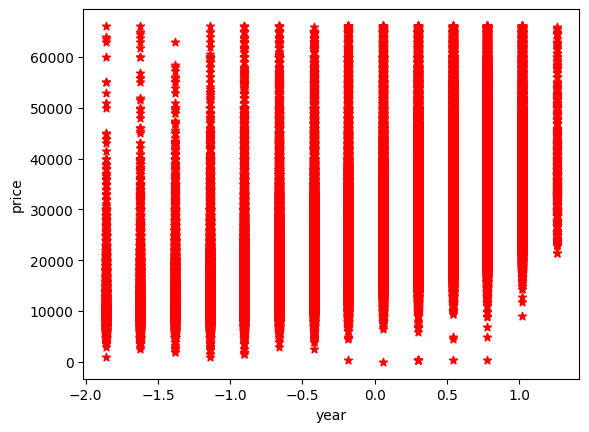

In [39]:
plt.xlabel('year')
plt.ylabel('price')
plt.scatter(df.year, df.price,marker='*',color = 'red')
plt.show()  

In [40]:
manu = pd.get_dummies(df['manufacturer'])
mo = pd.get_dummies(df['model_name'])
en = pd.get_dummies(df['new_engine'])
tr = pd.get_dummies(df['new_transmission_series'])
dr = pd.get_dummies(df['drivetrain'])
fu = pd.get_dummies(df['fuel_type'])
mp = pd.get_dummies(df['mpg'])
ex = pd.get_dummies(df['exterior_color'])
inter = pd.get_dummies(df['interior_color'])

In [41]:
print(df.shape)

(350765, 23)


In [42]:
newDf = pd.concat([df.loc[:, numerical_columns],manu,mo,en,tr,dr,fu,mp,ex,inter,df.price],axis = 'columns')

In [43]:
newDf.shape

(350765, 1309)

In [45]:
newDf.head()

,mpg_lower,mpg_upper,year,mileage,accidents_or_damage,one_owner,personal_use_only,driver_rating,driver_reviews_num,price_drop,...,silver,tan,taupe,teal,topaz,umber,violet,white,yellow,price
85,-0.254678,-0.132257,-1.381239,2.077152,1.771738,-1.074452,0.708512,0.275815,-0.784043,-0.523125,...,False,False,True,False,False,False,False,False,False,14491.0
86,-0.254678,-0.132257,-1.861237,0.627143,1.771738,-1.074452,0.708512,0.275815,-0.702855,-0.523125,...,False,False,False,False,False,False,False,True,False,20991.0
87,-0.254678,-0.132257,-1.861237,1.856767,-0.564418,-1.074452,-1.411408,0.275815,-0.702855,-0.426901,...,False,False,False,False,False,False,False,False,False,12800.0
88,-0.254678,-0.132257,-1.381239,1.201190,-0.564418,-1.074452,0.708512,0.275815,-0.784043,-0.523125,...,False,True,False,False,False,False,False,False,False,15995.0
93,-0.254678,-0.132257,-1.621238,0.751892,-0.564418,-1.074452,-1.411408,-0.454975,-0.751568,-0.523125,...,False,False,False,False,False,False,False,False,False,15675.0


In [46]:
y = newDf.price
X = newDf.drop('price',axis = 1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05)

In [48]:
model = RandomForestRegressor()

In [49]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
model.score(X_test,y_test)

0.9347807594427286

In [52]:
model.score(X_train,y_train)

0.9909901680844021

In [53]:
import pickle
fileName = "trainedModel.sav"
pickle.dump(model,open(fileName,'wb'))